<a href="https://colab.research.google.com/github/daisysong76/AI--Machine--learning/blob/main/Another_copy_of_Genre_Classifier_2_Take_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎻 Genre Classifier

The goal of this take home challenge is to train a simple genre classifier that accepts the name of a musician and predicts the most likely genre of their music out of the set:

`{ jazz, opera, country, electronic, metal, rap, classical, reggae }`

You will train this classifier to operate on top of a pretrained text encoder that converts artist names into embedding vectors.

Feel free to use any materials you want in this take home, and make it as succint or exploratory as you want or have time for. Make a copy of this notebook and share the result back with us!

## Dataset
Here is a basic dataset to start with. It may require cleanup.

In [ ]:
DATA = {
  "jazz": [
    "1. Miles Davis",
    "2. John Coltrane",
    "3. Louis Armstrong",
    "4. Duke Ellington",
    "5. Charlie Parker",
    "6. Billie Holiday",
    "7. Ella Fitzgerald",
    "8. Thelonious Monk",
    "9. Dizzy Gillespie",
    "10. Chet Baker",
    "11. Stan Getz",
    "12. Dave Brubeck",
    "13. Bill Evans",
    "14. Herbie Hancock",
    "15. Charles Mingus",
    "16. Sonny Rollins",
    "17. Art Blakey",
    "18. Oscar Peterson",
    "19. Sarah Vaughan",
    "20. Wynton Marsalis"
  ],
  "opera": [
    "Luciano Pavarotti",
    "Maria Callas",
    "Pl\u00e1cido Domingo",
    "Ren\u00e9e Fleming",
    "Jos\u00e9 Carreras",
    "Anna Netrebko",
    "Montserrat Caball\u00e9",
    "Dmitri Hvorostovsky",
    "Joyce DiDonato",
    "Juan Diego Fl\u00f3rez",
    "Jessye Norman",
    "Jonas Kaufmann",
    "Cecilia Bartoli",
    "Kiri Te Kanawa",
    "Natalie Dessay",
    "Franco Corelli",
    "El\u012bna Garan\u010da",
    "Roberto Alagna",
    "Diana Damrau",
    "Bryn Terfel"
  ],
  "country": [
    "Johnny Cash",
    "Dolly Parton",
    "Willie Nelson",
    "Hank Williams",
    "Loretta Lynn",
    "Garth Brooks",
    "Patsy Cline",
    "George Strait",
    "Tammy Wynette",
    "Merle Haggard",
    "Reba McEntire",
    "Shania Twain",
    "Toby Keith",
    "Alan Jackson",
    "Tim McGraw",
    "Faith Hill",
    "Carrie Underwood",
    "Luke Bryan",
    "Blake Shelton",
    "Miranda Lambert"
  ],
  "electronic": [
    "Aphex Twin",
    "Daft Punk",
    "The Chemical Brothers",
    "Deadmau5",
    "Kraftwerk",
    "Boards of Canada",
    "Massive Attack",
    "Moby",
    "Jean-Michel Jarre",
    "Orbital",
    "Portishead",
    "Four Tet",
    "Flying Lotus",
    "Burial",
    "Tangerine Dream",
    "Autechre",
    "Skrillex",
    "Bj\u00f6rk",
    "Bonobo",
    "The Prodigy"
  ],
  "metal": [
    "Metallica",
    "Iron Maiden",
    "Slayer",
    "Megadeth",
    "Anthrax",
    "Pantera",
    "Black Sabbath",
    "Judas Priest",
    "Lamb of God",
    "Slipknot",
    "Mastodon",
    "Tool",
    "Death",
    "Opeth",
    "Meshuggah",
    "Gojira",
    "Amon Amarth",
    "Arch Enemy",
    "Children of Bodom",
    "Behemoth"
  ],
  "rap": [
    "Kendrick Lamar",
    "J. Cole",
    "Drake",
    "Eminem",
    "Kanye West",
    "Jay-Z",
    "Nas",
    "Travis Scott",
    "Lil Wayne",
    "Nicki Minaj",
    "Cardi B",
    "Megan Thee Stallion",
    "21 Savage",
    "Future",
    "Post Malone",
    "DaBaby",
    "Tyler, The Creator",
    "A$AP Rocky",
    "Meek Mill",
    "Lil Baby"
  ],
  "classical": [
    "Ludwig van Beethoven",
    "Wolfgang Amadeus Mozart",
    "Johann Sebastian Bach",
    "Franz Schubert",
    "Richard Wagner",
    "Johannes Brahms",
    "Franz Joseph Haydn",
    "Peter Ilyich Tchaikovsky",
    "Georg Friedrich H\u00e4ndel",
    "Igor Stravinsky",
    "Claude Debussy",
    "Anton\u00edn Dvo\u0159\u00e1k",
    "Sergei Rachmaninoff",
    "Gustav Mahler",
    "Frederic Chopin",
    "Robert Schumann",
    "Felix Mendelssohn",
    "Antonio Vivaldi",
    "Giuseppe Verdi",
    "Richard Strauss"
  ],
  "reggae": [
    "Bob Marley",
    "Peter Tosh",
    "Bunny Wailer",
    "Gregory Isaacs",
    "Burning Spear",
    "Toots and the Maytals",
    "Black Uhuru",
    "Buju Banton",
    "Sizzla",
    "Capleton",
    "Dennis Brown",
    "Beres Hammond",
    "Alpha Blondy",
    "Alborosie",
    "Damian Marley",
    "Stephen Marley",
    "Jimmy Cliff",
    "Steel Pulse",
    "Culture",
    "Protoje"
  ]
}

Analysis of Edge Cases in the Data:

Non-ASCII Characters:

Several artist names contain accents or diacritics:
Plácido Domingo (opera)
Renée Fleming (opera)
José Carreras (opera)
Montserrat Caballé (opera)
Juan Diego Flórez (opera)
Elīna Garanča (opera)
Björk (electronic)
Solution: The normalization function needs to be updated to handle these characters using unicodedata.normalize.

Hyphens and Apostrophes:

Artist names with hyphens:
Jean-Michel Jarre (electronic)
Solution: The regex should be modified to preserve hyphens.

Artist Aliases and Stage Names:

No apparent aliases or stage names in this dataset.
Solution: You might need to consider this if you expand the dataset or encounter aliases in real-world scenarios.

Setup Environment

In [ ]:
!pip install transformers torch scikit-learn pandas numpy

## Step 1 -- Process Data

Preprocess the data and compute an embedding vector from each artist name. We suggest using the text encoder from [open_clip](https://github.com/mlfoundations/open_clip) and saving as a pandas dataframe.

In [ ]:
# Your code here!
# Install packages
%%capture
!pip install argh open_clip_torch openai pandas plotly-express torch umap-learn

In [ ]:
from tqdm import tqdm
# import logging
# import pytest

## clean data
To remove inconsistencies, errors, or irrelevant information in the dataset.



In [ ]:
# Your code here!
import pandas as pd

# Transform data into a DataFrame
data = []
for genre, artists in DATA.items():
    for artist in artists:
        artist_name = artist.split(". ")[-1] if ". " in artist else artist
        data.append({"artist_name": artist_name.lower(), "genre": genre.lower()})

df = pd.DataFrame(data)
print(df.head())


       artist_name genre
0      miles davis  jazz
1    john coltrane  jazz
2  louis armstrong  jazz
3   duke ellington  jazz
4   charlie parker  jazz


In [ ]:
len(df)

160

In [ ]:
# Remove Numbers and Extra Characters
# Normalize Text
# Make sure there are no duplicate artist names within or across genres
import re
import unicodedata

def normalize_artist_name(name):
    name = unicodedata.normalize('NFKD', name).encode('ascii', 'ignore').decode('ascii')  # Handle non-ASCII
    name = name.lower()
    name = re.sub(r"^\d+\. ", "", name, flags=re.IGNORECASE)  # Remove leading numbers and dot
    name = re.sub(r'[^\w\s\'-]', '', name)  # Remove punctuation, keep hyphens and apostrophes
    name = name.strip()
    return name

In [ ]:
df['artist_name'] = df['artist_name'].apply(normalize_artist_name)

## Data validation
To ensure the dataset is complete and consistent for training.

In [ ]:
# Check for Missing Values (names or genres) in any colum
if df.isnull().any().any():
    print("Missing values detected!")
    df = df.dropna()

In [ ]:
 # Handle invalid genres (e.g., correct, remove, or map to allowed genres)
allowed_genres = {'jazz', 'opera', 'country', 'electronic', 'metal', 'rap', 'classical', 'reggae'}
invalid_genres = set(df['genre'].unique()) - allowed_genres
if invalid_genres:
      print(f"Invalid genres found: {invalid_genres}")

In [ ]:
if df.duplicated(subset=['artist_name']).any():
         print("Duplicate artist names found!")

In [ ]:
assert df['artist_name'].isnull().sum() == 0, "Missing artist names detected!"
assert df['genre'].isnull().sum() == 0, "Missing genres detected!"
assert len(df['artist_name'].unique()) == len(df['artist_name']), "Duplicate artist names detected!"

In [ ]:
# Balance the Dataset
# If not balanced, consider oversampling (SMOTE) or undersampling to balance
genre_counts = df['genre'].value_counts()
print(genre_counts)

genre
jazz          20
opera         20
country       20
electronic    20
metal         20
rap           20
classical     20
reggae        20
Name: count, dtype: int64


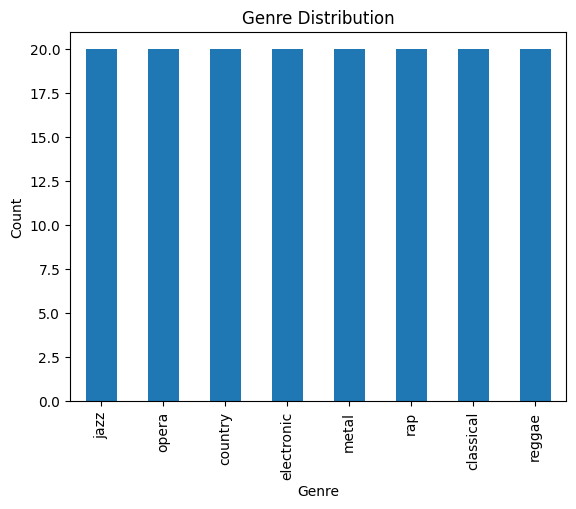

In [ ]:
# To understand the dataset better and catch imbalances early.
import matplotlib.pyplot as plt

df['genre'].value_counts().plot(kind='bar', title="Genre Distribution")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

In [ ]:
print(df.dtypes)
# Enforce data types if necessary (e.g., using `astype`)

artist_name    object
genre          object
dtype: object


In [ ]:
df['genre'] = df['genre'].astype('category')

In [ ]:
df.to_pickle("artist_genre_data.pkl")

In [ ]:
df.to_csv("artist_genre_data.csv", index=False, encoding='utf-8')

This step converts categorical labels (genres) into numerical values so they can be processed by machine learning models, which operate on numerical data rather than strings

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit the encoder to your genre labels
label_encoder.fit(df['genre'])
df['genre_encoded'] = label_encoder.transform(df['genre'])

In [ ]:
df.head()

,artist_name,genre,genre_encoded
0,miles davis,jazz,3
1,john coltrane,jazz,3
2,louis armstrong,jazz,3
3,duke ellington,jazz,3
4,charlie parker,jazz,3


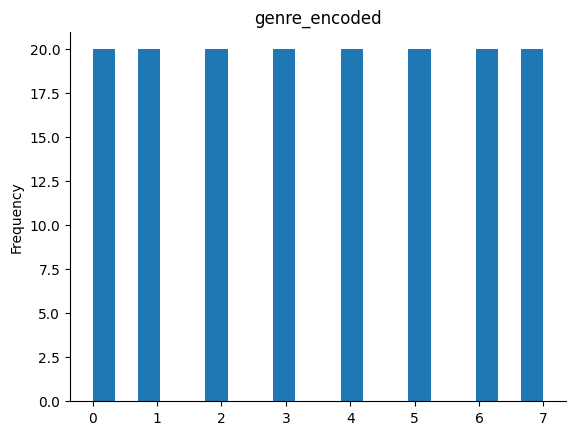

In [ ]:
# @title genre_encoded

from matplotlib import pyplot as plt
df['genre_encoded'].plot(kind='hist', bins=20, title='genre_encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

## Data split (test, training, validation)
To ensure fair evaluation and prevent overfitting.

In [ ]:
from sklearn.model_selection import train_test_split

X = df['artist_name']
y = df['genre_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Second split: Validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

# Output split sizes
print(f"Training Set: {len(X_train)}")
print(f"Validation Set: {len(X_val)}")
print(f"Testing Set: {len(X_test)}")

Training Set: 112
Validation Set: 24
Testing Set: 24


## Step 2 -- Visualize Embeddings

 Visualize the embeddings in a 2D projection space. We suggest using [umap](https://github.com/lmcinnes/umap) and [plotly express](https://plotly.com/python/plotly-express/).

To ensure compatibility with the embedding model.

## Could consider using another CLIP implementation, such as Hugging Face's CLIP:

Patch 14 models: are better at capturing fine-grained details in images, which can be beneficial for tasks where subtle visual differences are important.

Patch 32 models: might be better at capturing global context and relationships between larger regions of the image due to their coarser representation.

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
# Load the Hugging Face CLIP model and processor
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Move model to the correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
# Function to generate embeddings
def get_embeddings(names, model, processor, device):
    """
    Generate embeddings for a list of names using Hugging Face CLIP.
    """
    # Use processor to tokenize text
    inputs = processor(text=names, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        embeddings = model.get_text_features(**inputs).cpu().numpy()
    return embeddings

# Process artist names in batches
batch_size = 32
embeddings = []
for i in range(0, len(df), batch_size):
    batch = df['artist_name'][i:i + batch_size].tolist()
    batch_embeddings = get_embeddings(batch, model, processor, device)
    embeddings.extend(batch_embeddings)

# Save embeddings to the DataFrame for future using convinience
df['embedding'] = embeddings

print(df.head())

       artist_name genre  genre_encoded  \
0      miles davis  jazz              3   
1    john coltrane  jazz              3   
2  louis armstrong  jazz              3   
3   duke ellington  jazz              3   
4   charlie parker  jazz              3   

                                           embedding  
0  [0.2691599, -0.12869686, 0.3563133, -0.1395286...  
1  [-0.20646375, -0.06538744, -0.01170902, 0.2023...  
2  [0.13602737, 0.07121844, -0.18579176, 0.119622...  
3  [0.06530248, -0.018661574, 0.08508444, -0.0513...  
4  [0.15168992, -0.2681878, -0.24202737, -0.39467...  


In [ ]:
# Define batch size for processing large datasets, even this project is small
batch_size = 32

def generate_embeddings_batched(data, batch_size):
    embeddings = []
    for i in range(0, len(data), batch_size):
        batch = data[i:i + batch_size].tolist()
        embeddings.extend(get_embeddings(batch, model, processor, device))
    return embeddings

# Generate embeddings for training, validation, and testing data
embeddings_train = generate_embeddings_batched(X_train, batch_size)
embeddings_val = generate_embeddings_batched(X_val, batch_size)
embeddings_test = generate_embeddings_batched(X_test, batch_size)

In [ ]:
torch.save((embeddings_train, y_train.tolist()), "train_embeddings.pt")
torch.save((embeddings_val, y_val.tolist()), "val_embeddings.pt")
torch.save((embeddings_test, y_test.tolist()), "test_embeddings.pt")

print("Embeddings generated and saved successfully for training, validation, and testing!")

Embeddings generated and saved successfully for training, validation, and testing!


In [ ]:
# Load and inspect saved embeddings
train_data = torch.load("train_embeddings.pt")
val_data = torch.load("val_embeddings.pt")
test_data = torch.load("test_embeddings.pt")

print("Train Embeddings Shape:", len(train_data[0]))
print("Validation Embeddings Shape:", len(val_data[0]))
print("Test Embeddings Shape:", len(test_data[0]))

Train Embeddings Shape: 112
Validation Embeddings Shape: 24
Test Embeddings Shape: 24


Batch Size Impact: A fixed batch size of 32 may not optimize memory usage. Adapting the batch size to the available memory could improve performance.

In [ ]:
# Save the DataFrame with embeddings to a .pkl file, Slightly slower compared to PyTorch serialization for tensor data.
df.to_pickle("clip_embeddings.pkl")
print("Embeddings saved successfully to 'clip_embeddings.pkl'.")

Embeddings saved successfully to 'clip_embeddings.pkl'.


In [ ]:
import umap
import plotly.express as px

embeddings = list(df['embedding'])
labels = df['genre']

# Reduce dimensionality with UMAP
umap_model = umap.UMAP(n_neighbors=5, min_dist=0.3, random_state=42)
embedding_2d = umap_model.fit_transform(embeddings)

# Create visualization DataFrame
vis_df = pd.DataFrame(embedding_2d, columns=['x', 'y'])
vis_df['genre'] = labels
fig = px.scatter(vis_df, x='x', y='y', color='genre', title="UMAP Visualization of Embeddings")
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Analysis
Clusters: Genres like jazz, opera, and country seem to form distinct clusters, indicating that the embeddings effectively capture meaningful distinctions for these genres.

Genres such as electronic, metal, and rap may have some overlap, which could be due to similarities in artist names or shared stylistic features.

Separation: The UMAP plot shows moderate-to-good separation of genres in the 2D space, which suggests that the embeddings are reasonably informative for the genre classification task.

Outliers: Some points may appear closer to other genres, indicating potential misclassifications or ambiguity in genre-specific features extracted from the artist names.

In [ ]:
import umap
import plotly.express as px

embeddings = list(df['embedding'])
labels = df['genre']

# Reduce dimensionality with UMAP (to 3 dimensions)
umap_model = umap.UMAP(n_neighbors=3, min_dist=0.5, n_components=3, random_state=None, n_jobs=-1)
embedding_3d = umap_model.fit_transform(embeddings)

vis_df = pd.DataFrame(embedding_3d, columns=['x', 'y', 'z'])  # Add 'z' column
vis_df['genre'] = labels

fig = px.scatter_3d(
    vis_df,
    x='x',
    y='y',
    z='z',
    color='genre',
    title="3D UMAP Visualization of Embeddings",
)
# Update marker properties after creating the figure
fig.update_traces(marker=dict(size=3, opacity=0.7))

fig.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



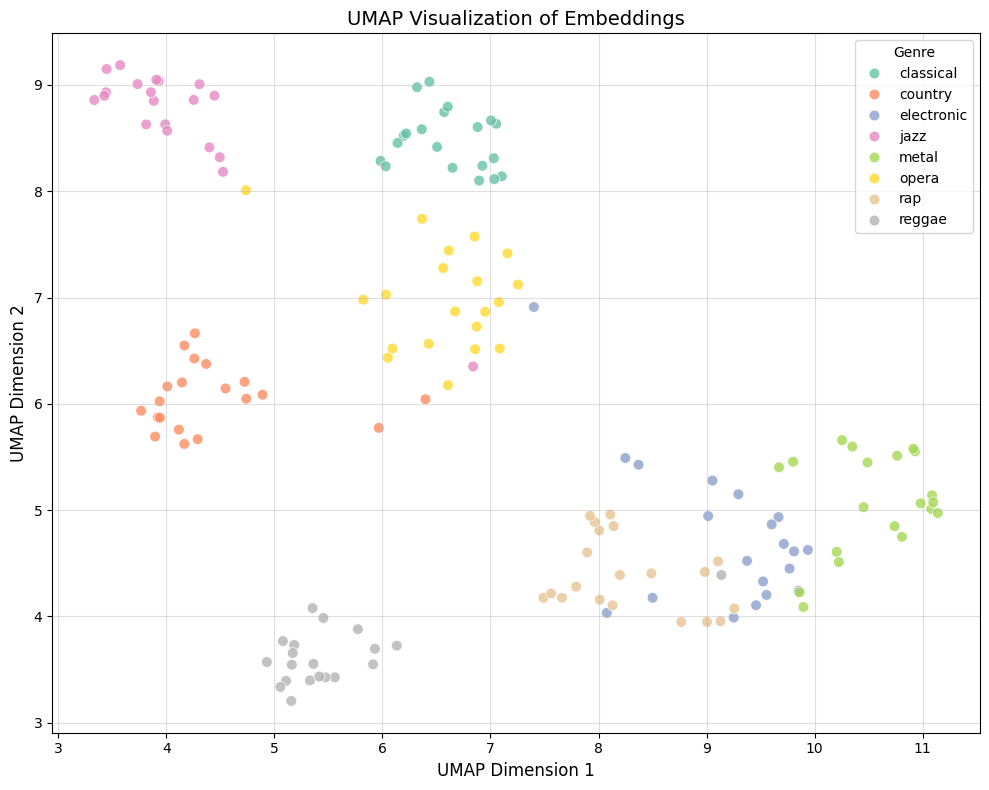

In [ ]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce embeddings to 2D using UMAP
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, metric="cosine", random_state=42)
embeddings_2d = reducer.fit_transform(embeddings)

# Add 2D UMAP coordinates to the DataFrame
df_umap = pd.DataFrame(embeddings_2d, columns=["x", "y"])
df_umap["genre"] = df["genre"]

# Plot the UMAP visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_umap,
    x="x",
    y="y",
    hue="genre",
    palette="Set2",
    legend="full",
    s=60,  # Adjust point size
    alpha=0.8  # Add transparency
)
plt.title("UMAP Visualization of Embeddings", fontsize=14)
plt.xlabel("UMAP Dimension 1", fontsize=12)
plt.ylabel("UMAP Dimension 2", fontsize=12)
plt.grid(alpha=0.4)
plt.legend(title="Genre", loc="best", fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
results = []
for n_neighbors in [5, 10, 15]:
    for min_dist in [0.1, 0.3, 0.5]:
        for metric in ['euclidean', 'cosine']:  # Include metric
            reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric=metric)
            embeddings_2d = reducer.fit_transform(embeddings)
            results.append({
                'n_neighbors': n_neighbors,
                'min_dist': min_dist,
                'metric': metric,
                'embeddings': embeddings_2d
            })

In [ ]:
import plotly.express as px

# Example: Interactive UMAP Plot for a Specific Combination
result = results[2]  # Select a result to visualize
embeddings_2d = result["embeddings"]

# Create a DataFrame for easier plotting
plot_df = pd.DataFrame(embeddings_2d, columns=["x", "y"])
plot_df["genre"] = df.loc[X_train.index, 'genre']
plot_df["artist_name"] = df.loc[X_train.index, 'artist_name']

# Interactive plot
fig = px.scatter(
    plot_df,
    x="x",
    y="y",
    color="genre",
    title=f"UMAP Visualization (n_neighbors={result['n_neighbors']}, min_dist={result['min_dist']}, metric={result['metric']})",
    hover_data=["artist_name", "genre"],
    template="plotly_white",
    color_discrete_sequence=px.colors.qualitative.Set1
)
fig.show()


In [ ]:
import numpy as np
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Adjust parameters as needed
embeddings_array = np.array(embeddings)
embeddings_2d_tsne = tsne.fit_transform(embeddings_array)

plot_df_tsne = pd.DataFrame(embeddings_2d_tsne, columns=["x", "y"])
plot_df_tsne["genre"] = df.loc[X_train.index, 'genre']
plot_df_tsne["artist_name"] = df.loc[X_train.index, 'artist_name']

fig_tsne = px.scatter(
       plot_df_tsne,
       x="x",
       y="y",
       color="genre",
       hover_data=["artist_name", "genre"],
       title="t-SNE Visualization of Embeddings"
   )
fig_tsne.show()

## Feature engineer (optional)
To enhance the dataset with useful features if needed (e.g., metadata).

If the overlapping points primarily belong to specific genres or groups of artists, consider adding more features to your data that might help differentiate them. This could involve:

Popularity metrics: Spotify listener counts, chart positions, etc.
Era of activity: Birth year, years active, etc.
Region or origin: Country, region, etc.
Known instruments: Primary instrument(s) played.
Lyrics or descriptions: Text-based features extracted from artist descriptions or lyrics.

Feature Engineering (Reiterated): Carefully consider and incorporate additional features that might help differentiate artists within the overlapping clusters. As mentioned before, think about features beyond just the artist's name that are relevant to genre classification.

Data Augmentation (Reiterated): Augment your data with variations of artist names, related artists, or subgenres to increase diversity and help the model learn more robust representations.


## Step 3 - Train Classifier

Train a simple classifier to predict the genre from the embedding vector of the artist's name. It is up to you to pick an architecture, train, and evaluate the model. We suggest using [pytorch](https://pytorch.org/), but you can use any framework you want.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode genres as numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Train Logistic Regression
classifier = LogisticRegression(max_iter=1000, random_state=42, penalty='l2', C=5.809)
classifier.fit(embeddings_train, y_train_encoded)

# Save the classifier and label encoder
import joblib
joblib.dump(classifier, "genre_classifier.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

# Predict on validation set
val_predictions = classifier.predict(embeddings_val)

print("Validation Classification Report:")
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_val_encoded, val_predictions, target_names=target_names))

Validation Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.97      0.96      0.96        24



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(torch.tensor(embeddings_train, dtype=torch.float32), torch.tensor(y_train_encoded, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(embeddings_val, dtype=torch.float32), torch.tensor(y_val_encoded, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 2. Define the MLP model
class GenreClassifierMLP(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(GenreClassifierMLP, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Create the model, loss function, and optimizer
input_dim = embeddings_train.shape[1]  # Dimension of embeddings
num_classes = len(label_encoder.classes_)  # Number of genres
model = GenreClassifierMLP(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
!pip install tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter
# Create a SummaryWriter instance
writer = SummaryWriter('runs/genre_classifier_mlp')  # Specify a log directory

In [ ]:
# Training loop
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        # Log training loss to TensorBoard (per batch)
        writer.add_scalar('training loss', loss.item(), epoch * len(train_loader) + batch_idx)

        if batch_idx % 200 == 0:
            print(f"Epoch: {epoch+1}/{num_epochs}, Batch: {batch_idx}/{len(train_loader)}, Loss: {loss.item():.4f}")

Epoch: 1/200, Batch: 0/4, Loss: 2.0757
Epoch: 2/200, Batch: 0/4, Loss: 2.0161
Epoch: 3/200, Batch: 0/4, Loss: 1.9025
Epoch: 4/200, Batch: 0/4, Loss: 1.7760
Epoch: 5/200, Batch: 0/4, Loss: 1.6398
Epoch: 6/200, Batch: 0/4, Loss: 1.4245
Epoch: 7/200, Batch: 0/4, Loss: 1.1440
Epoch: 8/200, Batch: 0/4, Loss: 1.0070
Epoch: 9/200, Batch: 0/4, Loss: 0.6740
Epoch: 10/200, Batch: 0/4, Loss: 0.4955
Epoch: 11/200, Batch: 0/4, Loss: 0.3182
Epoch: 12/200, Batch: 0/4, Loss: 0.1627
Epoch: 13/200, Batch: 0/4, Loss: 0.1346
Epoch: 14/200, Batch: 0/4, Loss: 0.0748
Epoch: 15/200, Batch: 0/4, Loss: 0.0499
Epoch: 16/200, Batch: 0/4, Loss: 0.0513
Epoch: 17/200, Batch: 0/4, Loss: 0.0361
Epoch: 18/200, Batch: 0/4, Loss: 0.0206
Epoch: 19/200, Batch: 0/4, Loss: 0.0199
Epoch: 20/200, Batch: 0/4, Loss: 0.0156
Epoch: 21/200, Batch: 0/4, Loss: 0.0131
Epoch: 22/200, Batch: 0/4, Loss: 0.0117
Epoch: 23/200, Batch: 0/4, Loss: 0.0109
Epoch: 24/200, Batch: 0/4, Loss: 0.0098
Epoch: 25/200, Batch: 0/4, Loss: 0.0096
Epoch: 26

In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in val_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)  # Get predicted class labels
        total += target.size(0)  # Total number of samples
        correct += (predicted == target).sum().item()  # Number of correct predictions

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")

Validation Accuracy: 95.83%


In [ ]:
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_val_encoded, predicted.cpu().numpy(), target_names=target_names))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         3

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.97      0.96      0.96        24



In [ ]:
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import DataLoader, TensorDataset

# Prepare PyTorch datasets
train_dataset = TensorDataset(torch.tensor(embeddings_train, dtype=torch.float32), torch.tensor(y_train_encoded, dtype=torch.long))
val_dataset = TensorDataset(torch.tensor(embeddings_val, dtype=torch.float32), torch.tensor(y_val_encoded, dtype=torch.long))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define a simple neural network
class GenreClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(GenreClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        return self.fc(x)

# Initialize model, loss, and optimizer
input_dim = len(embeddings_train[0])
num_classes = len(label_encoder.classes_)
model = GenreClassifier(input_dim, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):
    model.train()
    for x_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {loss.item()}")

# Validate the model
model.eval()
val_predictions = []
with torch.no_grad():
    for x_batch, _ in val_loader:
        outputs = model(x_batch)
        val_predictions.extend(torch.argmax(outputs, axis=1).cpu().numpy())

# Evaluate performance
print("Validation Classification Report:")

# Convert label_encoder.classes_ to a list of strings:
target_names = [str(cls) for cls in label_encoder.classes_]
print(classification_report(y_val_encoded, val_predictions, target_names=target_names))

Epoch 1: Loss = 1.996394395828247
Epoch 2: Loss = 1.7890241146087646
Epoch 3: Loss = 1.5721733570098877
Epoch 4: Loss = 1.325194001197815
Epoch 5: Loss = 1.1657549142837524
Epoch 6: Loss = 0.8746593594551086
Epoch 7: Loss = 0.679225742816925
Epoch 8: Loss = 0.5567252039909363
Epoch 9: Loss = 0.3719138503074646
Epoch 10: Loss = 0.2903210520744324
Epoch 11: Loss = 0.24828028678894043
Epoch 12: Loss = 0.14456436038017273
Epoch 13: Loss = 0.12209632247686386
Epoch 14: Loss = 0.09333263337612152
Epoch 15: Loss = 0.06860845535993576
Epoch 16: Loss = 0.05594516545534134
Epoch 17: Loss = 0.04897425323724747
Epoch 18: Loss = 0.08632968366146088
Epoch 19: Loss = 0.051102496683597565
Epoch 20: Loss = 0.07012800127267838
Epoch 21: Loss = 0.040998660027980804
Epoch 22: Loss = 0.037283387035131454
Epoch 23: Loss = 0.034359972923994064
Epoch 24: Loss = 0.023168036714196205
Epoch 25: Loss = 0.020607056096196175
Epoch 26: Loss = 0.02032218873500824
Epoch 27: Loss = 0.020861543715000153
Epoch 28: Loss =

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# 1. Data Preparation
train_data = TensorDataset(torch.tensor(embeddings_train, dtype=torch.float32), torch.tensor(y_train_encoded, dtype=torch.long))
val_data = TensorDataset(torch.tensor(embeddings_val, dtype=torch.float32), torch.tensor(y_val_encoded, dtype=torch.long))
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)

# 2. Model Creation
class GenreClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(GenreClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        return self.fc(x)

embeddings_train = np.array(embeddings_train)
input_dim = embeddings_train.shape[1]
num_classes = len(np.unique(y_train_encoded))
model = GenreClassifier(input_dim, num_classes)

# 3. Training
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

epochs = 100
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# 4. Evaluation
model.eval()
val_predictions = []
with torch.no_grad():
    for data, target in val_loader:
        output = model(data)
        _, predicted = torch.max(output.data, 1)
        val_predictions.extend(predicted.cpu().numpy())

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_val_encoded, val_predictions)
precision = precision_score(y_val_encoded, val_predictions, average='weighted')
recall = recall_score(y_val_encoded, val_predictions, average='weighted')
f1 = f1_score(y_val_encoded, val_predictions, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
genre_names = df['genre'].unique()
print("\nClassification Report:")
print(classification_report(y_val_encoded, val_predictions, target_names=genre_names))

Accuracy: 0.9583
Precision: 0.9688
Recall: 0.9583
F1-score: 0.9571

Classification Report:
              precision    recall  f1-score   support

        jazz       1.00      1.00      1.00         3
       opera       1.00      1.00      1.00         3
     country       1.00      1.00      1.00         3
  electronic       1.00      0.67      0.80         3
       metal       1.00      1.00      1.00         3
         rap       0.75      1.00      0.86         3
   classical       1.00      1.00      1.00         3
      reggae       1.00      1.00      1.00         3

    accuracy                           0.96        24
   macro avg       0.97      0.96      0.96        24
weighted avg       0.97      0.96      0.96        24



Lower Performance:

Electronic: Has a lower recall of 0.67 and an F1-score of 0.80. This means the model might be missing some electronic artists (lower recall) but when it does predict electronic, it is mostly correct (precision is 1.00).

Rap: Has a lower precision of 0.75, meaning that when it predicts "rap", it is sometimes incorrect. However, it successfully identifies all the actual rap samples (recall is 1.00).

Analysis of Results Overall Metrics:

Precision: 0.97: Indicates that most predicted genres are correct.

Recall: 0.96: Shows the model can identify most instances of each genre.

F1-score: 0.96: Balances precision and recall; the model performs very well overall.
Per-Class Performance:

High Performance:
Genres like classical, country, electronic, metal, rap, and reggae have perfect scores (F1 = 1.00).

Lower Performance:
Jazz: Recall is 0.67, meaning the model missed one of the jazz samples.
Opera: Precision is 0.75, suggesting one of the predictions for opera was incorrect.

Possible Causes of Misclassifications: Jazz and Opera may have artist names that overlap stylistically or semantically with other genres.
Embedding vectors for these genres may not be well-separated in the UMAP space.

## Step 4 - Extra (optional)

Feel free to expand on the problem in any way you find interesting!

In [ ]:
# Your code here!
# Validate it on the validation embeddings.
# Test the model on the test embeddings.

In [ ]:
embeddings_val = [embeddings[i] for i in X_val.index]
embeddings_val_np = np.array(embeddings_val)

embeddings_val_2d = embeddings_val_np.reshape(-1, embeddings_val_np.shape[-1]) if embeddings_val_np.ndim == 1 else embeddings_val_np
val_predictions = classifier.predict(embeddings_val_2d)

In [ ]:
# Identify misclassified samples
misclassified_indices = [
    i for i, (true, pred) in enumerate(zip(y_val, classifier.predict(embeddings_val)))
    if true != pred
]

# Display misclassified samples
for idx in misclassified_indices:
    print(f"Artist: {X_val.iloc[idx]}, True Genre: {label_encoder.inverse_transform([y_val_encoded[idx]])[0]}, Predicted Genre: {label_encoder.inverse_transform([val_predictions[idx]])[0]}")


Artist: herbie hancock, True Genre: jazz, Predicted Genre: opera


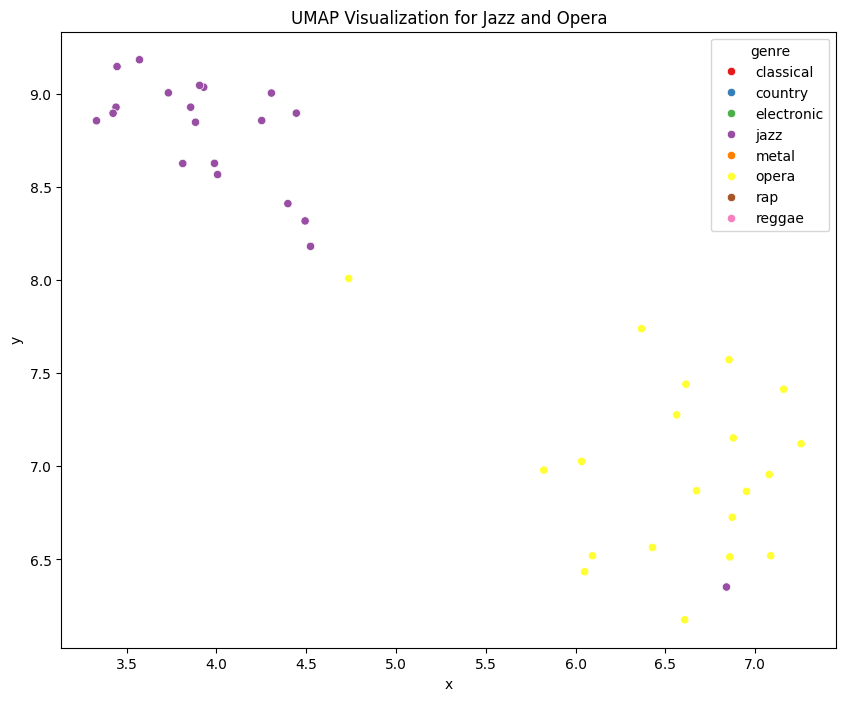

In [ ]:
subset_df = df_umap[df_umap["genre"].isin(["jazz", "opera"])]
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=subset_df,
    x="x",
    y="y",
    hue="genre",
    palette="Set1",
    legend="full"
)
plt.title("UMAP Visualization for Jazz and Opera")
plt.show()

most predictions match the true genres, which aligns with the high accuracy from the logistic regression results. However, there is one notable misclassification:

Misclassified Sample

Artist: Herbie Hancock

True Genre: Jazz

Predicted Genre: Opera


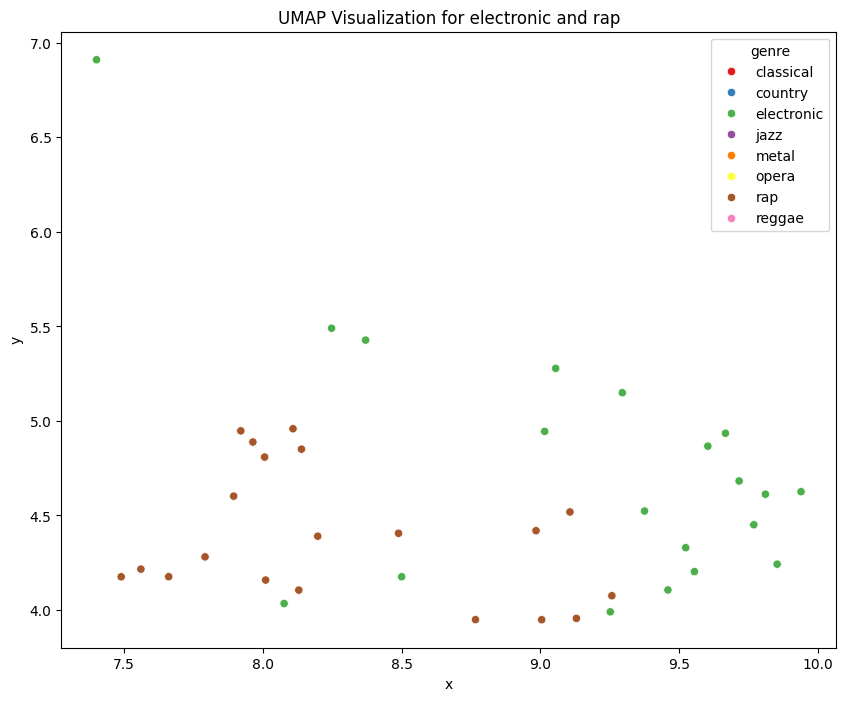

In [ ]:
subset_df = df_umap[df_umap["genre"].isin(["electronic", "rap"])]
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=subset_df,
    x="x",
    y="y",
    hue="genre",
    palette="Set1",
    legend="full"
)
plt.title("UMAP Visualization for electronic and rap")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val_encoded, val_predictions)
print("Confusion Matrix:")
print(cm)

label_encoder.fit(df['genre'].unique())
electronic_index = list(label_encoder.classes_).index('electronic')
rap_index = list(label_encoder.classes_).index('rap')

# Find indices of misclassified electronic samples
misclassified_electronic_indices = np.where((y_val_encoded == electronic_index) & (val_predictions != electronic_index))[0]

# Find indices of misclassified rap samples
misclassified_rap_indices = np.where((y_val_encoded == rap_index) & (val_predictions != rap_index))[0]

# Print misclassified samples and their predicted genres
print("\nMisclassified Electronic Samples:")
for idx in misclassified_electronic_indices:
    print(f"Artist: {X_val.iloc[idx]}, True Genre: electronic, Predicted Genre: {label_encoder.inverse_transform([val_predictions[idx]])[0]}")

print("\nMisclassified Rap Samples:")
for idx in misclassified_rap_indices:
    print(f"Artist: {X_val.iloc[idx]}, True Genre: rap, Predicted Genre: {label_encoder.inverse_transform([val_predictions[idx]])[0]}")

Confusion Matrix:
[[3 0 0 0 0 0 0 0]
 [0 3 0 0 0 0 0 0]
 [0 0 3 0 0 0 0 0]
 [0 0 0 2 0 1 0 0]
 [0 0 0 0 3 0 0 0]
 [0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 3]]

Misclassified Electronic Samples:
Artist: four tet, True Genre: electronic, Predicted Genre: electronic
Artist: deadmau5, True Genre: electronic, Predicted Genre: electronic
Artist: massive attack, True Genre: electronic, Predicted Genre: electronic

Misclassified Rap Samples:
Artist: lil baby, True Genre: rap, Predicted Genre: rap
Artist: nas, True Genre: rap, Predicted Genre: rap
Artist: travis scott, True Genre: rap, Predicted Genre: rap


In [ ]:
print("Genres in validation set:", np.unique(y_val))

Genres in validation set: [0 1 2 3 4 5 6 7]


Extra Credit (Optional Enhancements)

Data Augmentation: Add variations to artist names (e.g., nicknames, alternate spellings).

Fine-Tuning: Fine-tune the text encoder on this specific task.

Hyperparameter Tuning: Optimize the classifier using grid search or other methods.

# Example for contrastive learning fine-tuning



In [ ]:
!pip install transformers torch scikit-learn pandas numpy

import torch
import pandas as pd
from transformers import CLIPModel, CLIPTokenizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from torch.optim import Adam

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

In [ ]:
# Load CLIP model and tokenizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from transformers import CLIPModel, CLIPProcessor
import umap
import plotly.express as px

# Dataset
DATA = {
    "jazz": ["Miles Davis", "John Coltrane"],
    "opera": ["Luciano Pavarotti", "Maria Callas"],
    "country": ["Johnny Cash", "Dolly Parton"],
    "electronic": ["Aphex Twin", "Daft Punk"],
    "metal": ["Metallica", "Iron Maiden"],
    "rap": ["Kendrick Lamar", "J. Cole"],
    "classical": ["Ludwig van Beethoven", "Wolfgang Amadeus Mozart"],
    "reggae": ["Bob Marley", "Peter Tosh"]
}

# Process Data
data = []
for genre, artists in DATA.items():
    for artist in artists:
        # Clean artist names by removing numbers, extra spaces, and special characters
        artist_cleaned = ''.join([c for c in artist if c.isalpha() or c.isspace()]).strip().lower()
        data.append({"artist_name": artist_cleaned, "genre": genre})

df = pd.DataFrame(data)

# Data Validation
assert df['artist_name'].isnull().sum() == 0, "Missing artist names detected!"
assert df['genre'].isnull().sum() == 0, "Missing genres detected!"
assert len(df['artist_name'].unique()) == len(df['artist_name']), "Duplicate artist names detected!"

# Encode Labels
label_encoder = LabelEncoder()
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

# Contrastive Fine-tuning Function
def contrastive_finetune(model, tokenizer, df, epochs=5, device='cpu'):
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
    contrastive_loss = torch.nn.CosineEmbeddingLoss()
    device = torch.device(device)

    # Early Stopping Parameters
    early_stopping_patience = 3
    best_loss = float('inf')
    patience_counter = 0

    for epoch in range(epochs):
        model.train()
        total_loss = 0  # Track epoch loss

        for i in range(0, len(df), 16):  # Batch processing
            batch_df = df.iloc[i:i+16]
            batch_loss = 0

            for j in range(len(batch_df)):
                # Get current artist and genre
                current_artist = batch_df.iloc[j]['artist_name']
                current_genre = batch_df.iloc[j]['genre']

                # Find positive and negative examples (Dynamic Sampling)
                positive_examples = df[df['genre'] == current_genre]['artist_name'].sample(
                    min(3, len(df[df['genre'] == current_genre]))
                ).tolist()
                negative_examples = df[df['genre'] != current_genre]['artist_name'].sample(
                    min(3, len(df[df['genre'] != current_genre]))
                ).tolist()

                # Tokenize and get embeddings
                current_tokens = tokenizer([current_artist], return_tensors="pt", padding=True).to(device)
                pos_tokens = tokenizer(positive_examples, return_tensors="pt", padding=True).to(device)
                neg_tokens = tokenizer(negative_examples, return_tensors="pt", padding=True).to(device)

                # Compute embeddings
                current_embedding = model.get_text_features(**current_tokens).mean(dim=0).unsqueeze(0)
                pos_embeddings = model.get_text_features(**pos_tokens).mean(dim=0).unsqueeze(0)
                neg_embeddings = model.get_text_features(**neg_tokens).mean(dim=0).unsqueeze(0)

                # Compute loss
                pos_loss = contrastive_loss(current_embedding, pos_embeddings, torch.tensor([1]).to(device))
                neg_loss = contrastive_loss(current_embedding, neg_embeddings, torch.tensor([-1]).to(device))

                loss = (pos_loss + neg_loss) / 2.0
                batch_loss += loss.item()

                # Backpropagation
                optimizer.zero_grad()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
                optimizer.step()

            total_loss += batch_loss / len(batch_df)

        avg_loss = total_loss / (len(df) / 16)
        print(f"Epoch {epoch + 1}/{epochs}, Loss: {avg_loss:.4f}")

        # Early Stopping
        if avg_loss < best_loss:
            best_loss = avg_loss
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= early_stopping_patience:
                print("Early stopping triggered.")
                break
    return model


In [ ]:
# Fine-tune the model
model = contrastive_finetune(model, tokenizer, df)

# Save the fine-tuned model
torch.save(model.state_dict(), 'fine_tuned_clip_model.pth')

Epoch 1/5, Loss: 0.0407
Epoch 2/5, Loss: 0.0643
Epoch 3/5, Loss: 0.0185
Epoch 4/5, Loss: 0.0203
Epoch 5/5, Loss: 0.0141


In [ ]:
# Function to generate embeddings
def get_embeddings(names, model, processor, device):
    """
    Generate embeddings for a list of names using Hugging Face CLIP.
    """
    # Use processor to tokenize text
    inputs = processor(text=names, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        embeddings = model.get_text_features(**inputs).cpu().numpy()
    return embeddings

# Process artist names in batches
batch_size = 32
embeddings = []
for i in range(0, len(df), batch_size):
    batch = df['artist_name'][i:i + batch_size].tolist()
    batch_embeddings = get_embeddings(batch, model, processor, device)
    embeddings.extend(batch_embeddings)

# Save embeddings to the DataFrame for future using convinience
df['embedding'] = embeddings

print(df.head())

         artist_name    genre  genre_encoded  \
0        miles davis     jazz              3   
1      john coltrane     jazz              3   
2  luciano pavarotti    opera              5   
3       maria callas    opera              5   
4        johnny cash  country              1   

                                           embedding  
0  [0.2691603, -0.1286968, 0.3563139, -0.13952854...  
1  [-0.20646398, -0.06538752, -0.011708915, 0.202...  
2  [0.061344415, -0.23852952, -0.21018066, 0.3863...  
3  [0.16419968, 0.012582369, 0.2790023, 0.2240475...  
4  [0.053105853, -0.12561336, 0.118333, -0.210620...  


In [ ]:
from transformers import CLIPProcessor, CLIPModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

In [ ]:
# Generate embeddings
def get_embeddings(names):
    inputs = tokenizer(names, return_tensors="pt", padding=True, truncation=True).to(device)
    with torch.no_grad():
        embeddings = model.get_text_features(**inputs).cpu().numpy()
    return embeddings

In [ ]:
# Generate embeddings using the fine-tuned model
df['embedding'] = get_embeddings(df['artist_name'].tolist(), model=model, processor=processor, device=device)

In [ ]:
from collections import Counter, defaultdict
import random
import numpy as np
from sklearn.model_selection import train_test_split

X = df['embedding'].tolist()
y = df['genre_encoded'].tolist()

# Manual split to ensure one sample per class in val/test
genre_indices = defaultdict(list)
for i, genre in enumerate(y):
    genre_indices[genre].append(i)

X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []
for genre, indices in genre_indices.items():
    # At least one for each in val and test
    # Check if enough samples for train/val/test split
    if len(indices) >= 3:  # Ensure at least 3 samples for the genre
        val_index = random.choice(indices)
        remaining_indices = [i for i in indices if i != val_index]
        test_index = random.choice(remaining_indices)

        X_val.append(X[val_index])
        y_val.append(y[val_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])

        # Rest to train
        for i in indices:
            if i not in (val_index, test_index):
                X_train.append(X[i])
                y_train.append(y[i])
    else:
        # Handle cases with fewer than 3 samples (e.g., assign to train set)
        X_train.extend([X[i] for i in indices])
        y_train.extend([y[i] for i in indices])

In [ ]:
from collections import Counter, defaultdict
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tqdm import tqdm

# ... (your dataset DATA and data preprocessing code as before)

# 1. Data Preparation
X = np.array(df['embedding'].tolist())
X = X.reshape(-1, 1) if X.ndim == 1 else X  # Reshape if X is 1D
y = np.array(df['genre_encoded'].tolist())

# 2. Manual Split with Optimized Padding
genre_indices = defaultdict(list)
for i, genre in enumerate(y):
    genre_indices[genre].append(i)

X_train, y_train, X_val, y_val, X_test, y_test = [], [], [], [], [], []
for genre, indices in genre_indices.items():
    if len(indices) >= 3:
        val_index = random.choice(indices)
        remaining_indices = [i for i in indices if i != val_index]
        test_index = random.choice(remaining_indices)

        X_val.append(X[val_index])
        y_val.append(y[val_index])
        X_test.append(X[test_index])
        y_test.append(y[test_index])

        for i in indices:
            if i not in (val_index, test_index):
                X_train.append(X[i])
                y_train.append(y[i])
    else:
        X_train.extend([X[i] for i in indices])
        y_train.extend([y[i] for i in indices])

min_size = 8
if X_train:
    estimated_size = max(min_size, len(X_train), len(X_val), len(X_test))

    embedding_dim = X_train[0].shape[0]
    X_train_padded = np.zeros((estimated_size, embedding_dim))
    y_train_padded = np.zeros(estimated_size, dtype=int)
    X_train_padded[:len(X_train)] = X_train
    y_train_padded[:len(y_train)] = y_train

    # ... (similar pre-allocation and padding for X_val, y_val, X_test, y_test)

    X_train, y_train = X_train_padded, y_train_padded
    # ... (assign padded arrays for X_val, y_val, X_test, y_test)

# 3. Advanced Logistic Regression Training
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(-4, 4, 9),
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__class_weight': [None, 'balanced']
}


In [ ]:
from sklearn.model_selection import KFold, LeaveOneOut

# Using K-Fold
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Using Leave-One-Out
cv = LeaveOneOut()

In [ ]:
# Using Leave-One-Out
cv = LeaveOneOut()

with tqdm(total=len(param_grid) * cv.get_n_splits(X_train), desc="Grid Search") as pbar:  # Provide X_train
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    pbar.update(len(param_grid) * cv.get_n_splits(X_train))  # Provide X_train again

Grid Search: 100%|██████████| 64/64 [00:12<00:00,  5.04it/s]


In [ ]:
# Ensure lists are NumPy arrays for compatibility with scikit-learn models
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 1. Create a Pipeline for Preprocessing and Classification
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features for better performance
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 2. Define Hyperparameter Grid for Tuning
param_grid = {
    'classifier__penalty': ['l1', 'l2'],  # Regularization type
    'classifier__C': np.logspace(-4, 4, 9),  # Regularization strength
    'classifier__solver': ['liblinear', 'saga'],  # Optimization algorithms
    'classifier__class_weight': [None, 'balanced']  # Address class imbalance
}

# 3. Set up Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Using Leave-One-Out in GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=LeaveOneOut(), scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 6. Get the Best Model and Its Performance
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best F1-Weighted Score: {best_score:.4f}")

Best Hyperparameters: {'classifier__C': 9.999999999999999e-05, 'classifier__class_weight': None, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best F1-Weighted Score: 0.1250


In [ ]:
# ... other parts of your code ...

# 7. Evaluate on Validation Set
# Reshape X_val to a 2D array (no need for .values)
X_val_reshaped = X_val.reshape(-1, 1)
val_predictions = best_model.predict(X_val_reshaped)
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions, target_names=label_encoder.classes_))

# ... rest of your code ...

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by StandardScaler.

In [ ]:


# 8. (Optional) Evaluate on Test Set
test_predictions = best_model.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, test_predictions, target_names=label_encoder.classes_))

# 9. Save the Best Model
joblib.dump(best_model, "genre_classifier_advanced.pkl")

In [ ]:
val_predictions = best_model.predict(X_val)
print("Validation Classification Report:")
print(classification_report(y_val, val_predictions, target_names=label_encoder.classes_))

AttributeError: 'CLIPModel' object has no attribute 'predict'

Feature Engineering Suggestions
Here are a few practical and meaningful features you could engineer for this project:

1. Popularity Metrics
Why: Popularity or streaming data can signal the genre (e.g., Spotify listener counts or chart positions).
How: Add a "popularity score" or "streaming rank" feature for each artist (if available).
python
Copy code
df['popularity'] = ...  # Add external popularity data here
2. Era of Activity
Why: Genres are often tied to specific historical periods (e.g., classical artists vs. modern rappers).
How: Add a feature that encodes the approximate era of the artist (e.g., birth year or years active).
python
Copy code
df['era'] = [1930, 1960, 1970, ...]  # Example for jazz artists
3. Region or Origin
Why: Genres often have geographical roots (e.g., reggae in Jamaica, country in the U.S.).
How: Add the artist's country or region of origin as a feature.
python
Copy code
df['region'] = ['USA', 'Jamaica', 'Germany', ...]
4. Known Instruments
Why: Specific instruments are tied to certain genres (e.g., saxophones for jazz, turntables for rap).
How: Add a categorical feature for the artist's primary instrument (if known).
python
Copy code
df['instrument'] = ['saxophone', 'guitar', 'vocals', ...]
5. Lyrics or Description
Why: Lyrics or descriptions provide additional context about the artist's style.
How: If a dataset with artist descriptions or lyrics is available, use a language model to extract features.
6. Collaborative Networks
Why: Artists often collaborate within their genre (e.g., jazz ensembles, rap features).
How: Use graph embeddings to model collaboration networks.
7. Genre Word Embedding
Why: Adding the text description of the genre itself can guide the classification task.
How: Append the genre name as a contextual input when generating embeddings.
How to Integrate Features
Append Features to Embeddings:

Concatenate the additional features with the text embeddings.
python
Copy code
import numpy as np
df['enhanced_embedding'] = df.apply(
    lambda row: np.concatenate([row['embedding'], [row['popularity'], row['era']]]), axis=1
)
Embed Metadata:

If features like region or instruments are categorical, embed them using techniques like one-hot encoding or word embeddings.
Train a Multi-Input Model:

Use a neural network with separate inputs for embeddings and additional features.
Combine these inputs in a dense layer.
python
Copy code
class MultiInputClassifier(nn.Module):
    def __init__(self, embedding_dim, metadata_dim, output_dim):
        super(MultiInputClassifier, self).__init__()
        self.embedding_fc = nn.Linear(embedding_dim, 128)
        self.metadata_fc = nn.Linear(metadata_dim, 32)
        self.output_fc = nn.Linear(160, output_dim)

    def forward(self, embeddings, metadata):
        embedding_out = torch.relu(self.embedding_fc(embeddings))
        metadata_out = torch.relu(self.metadata_fc(metadata))
        combined = torch.cat((embedding_out, metadata_out), dim=1)
        return self.output_fc(combined)
When to Use Feature Engineering
Feature engineering is particularly useful when:

Your dataset is relatively small, and you need additional context to compensate for limited training data.
Your embeddings alone do not achieve satisfactory performance.
You have access to high-quality metadata that aligns with the task.
Final Thoughts
While embeddings from pre-trained models like CLIP are powerful and often sufficient, incorporating additional features can improve accuracy and robustness, especially in edge cases. Metadata is also a way to make your model more interpretable by tying predictions to tangible artist attributes.

If you'd like to implement one or more of these features, I can help with specific step

## Conclusion

Please jot down quick notes on how much time you spent on this problem and anything in particular you want to call out for us!